In [1]:
import pandas as pd
stats = pd.read_csv('game_stats.csv')

In [2]:
stats.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [3]:
print('Rows:' + str(stats.shape[0]) + ' Columns:' + str(stats.shape[1]))

Rows:128 Columns:27


In [4]:
stats.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [6]:
#get name of columns with missing values
nan_col = [i for i in stats.columns if stats[i].isnull().any()]
nan_col

['1st Goal', 'Own goals', 'Own goal Time']

In [7]:
na_total = stats.isna().sum().sum()
sample_total = stats.count().sum()

for i in range(len(nan_col)):
    if  na_total > int(sample_total/2):
        stats[nan_col[i]] = stats.dropna(axis=0)
    else:
        median = stats[nan_col[i]].median()
        stats[nan_col[i]] = stats[nan_col[i]].fillna(median)

stats

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,1.0,35.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,39.0,Group Stage,No,0,1.0,35.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,39.0,Group Stage,No,0,1.0,35.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,1.0,35.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,39.0,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,1.0,35.0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,1.0,35.0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,39.0,3rd Place,No,0,1.0,35.0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [8]:
import numpy as np
stats['PSO'] = pd.Series(np.where(stats.PSO.values == 'Yes', 1, 0), stats.index)
stats['Man of the Match'] = pd.Series(np.where(stats['Man of the Match'].values == 'Yes', 1, 0), stats.index)
stats

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,1,12.0,Group Stage,0,0,1.0,35.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,0,39.0,Group Stage,0,0,1.0,35.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,0,39.0,Group Stage,0,0,1.0,35.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,1,89.0,Group Stage,0,0,1.0,35.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,0,39.0,Group Stage,0,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,0,5.0,Semi- Finals,0,0,1.0,35.0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,1,4.0,3rd Place,0,0,1.0,35.0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,0,39.0,3rd Place,0,0,1.0,35.0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,1,18.0,Final,0,0,1.0,18.0


In [9]:
stats['Round'] = pd.factorize(stats['Round'])[0]
stats

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,1,12.0,0,0,0,1.0,35.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,0,39.0,0,0,0,1.0,35.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,0,39.0,0,0,0,1.0,35.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,1,89.0,0,0,0,1.0,35.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,0,39.0,0,0,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,0,5.0,3,0,0,1.0,35.0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,1,4.0,4,0,0,1.0,35.0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,0,39.0,4,0,0,1.0,35.0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,1,18.0,5,0,0,1.0,18.0


In [10]:
df_vector = pd.get_dummies(stats[['Team','Opponent']])
stats_clean = stats.join(df_vector)
stats_clean.reset_index(drop = True, inplace = True)
stats_clean

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,1,0,0,0,0,0,0,0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,1,0,0,0,0,0,0,0,0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,0,0,0,0,0,0,0,1
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,0,0,0,0,0,0,0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,0,0,0,0,0,0,0,0,0,0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,0,0,0,0,0,0,0,0,0,0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,0,0,0,0,0,0,0,0,0,0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
col_list = list(stats.select_dtypes(include=['object']).columns)
stats = stats.drop(col_list,axis=1)
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Goal Scored             128 non-null    int64  
 1   Ball Possession %       128 non-null    int64  
 2   Attempts                128 non-null    int64  
 3   On-Target               128 non-null    int64  
 4   Off-Target              128 non-null    int64  
 5   Blocked                 128 non-null    int64  
 6   Corners                 128 non-null    int64  
 7   Offsides                128 non-null    int64  
 8   Free Kicks              128 non-null    int64  
 9   Saves                   128 non-null    int64  
 10  Pass Accuracy %         128 non-null    int64  
 11  Passes                  128 non-null    int64  
 12  Distance Covered (Kms)  128 non-null    int64  
 13  Fouls Committed         128 non-null    int64  
 14  Yellow Card             128 non-null    in

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
%matplotlib inline 
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

In [13]:
stats.rename(columns={'Yellow & Red':'Yellow and Red'}, inplace=True)

In [14]:
corr = stats.corr()
corr 

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Yellow and Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Goal Scored,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,0.046815,-0.118893,...,-0.048838,-0.035031,-0.089714,0.522193,-0.193491,0.093045,-0.015759,-0.011204,NaN,-0.086161
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,-0.293658,...,-0.205511,0.090924,0.024316,0.110393,-0.043216,-0.000376,-0.002908,-0.010086,NaN,0.206999
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,0.140850,-0.268217,...,-0.185544,-0.074594,0.009795,0.176425,0.059534,0.110522,0.168314,0.149836,NaN,-0.018442
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,-0.321557,...,-0.115259,-0.051742,-0.023439,0.291346,-0.056365,0.082856,0.067975,0.040322,NaN,-0.131874
Off-Target,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,0.142367,-0.126644,...,-0.124094,-0.145577,-0.119332,0.152979,0.095433,0.072783,0.199176,0.185807,NaN,0.053835
Blocked,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,0.086021,-0.142960,...,-0.163111,0.033717,0.165295,-0.019582,0.071981,0.081440,0.109547,0.108220,NaN,0.030504
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,0.085216,-0.233787,...,-0.169929,0.014543,0.117960,0.173148,0.137906,0.051138,0.069544,0.088997,NaN,-0.003927
Offsides,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,0.089121,0.006539,...,-0.047757,0.228531,-0.036432,0.026288,-0.098128,-0.174162,-0.074664,-0.064892,NaN,-0.089161
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,-0.231637,...,-0.026741,0.029701,-0.104164,0.119534,-0.005828,-0.050288,0.108880,0.138046,NaN,-0.008850
Saves,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.142960,-0.233787,0.006539,-0.231637,1.000000,...,0.009670,0.140307,0.016875,-0.034443,-0.114223,0.051810,0.097824,0.110014,NaN,0.002683


Text(0.5, 1.0, 'Heatmap of Correlation')

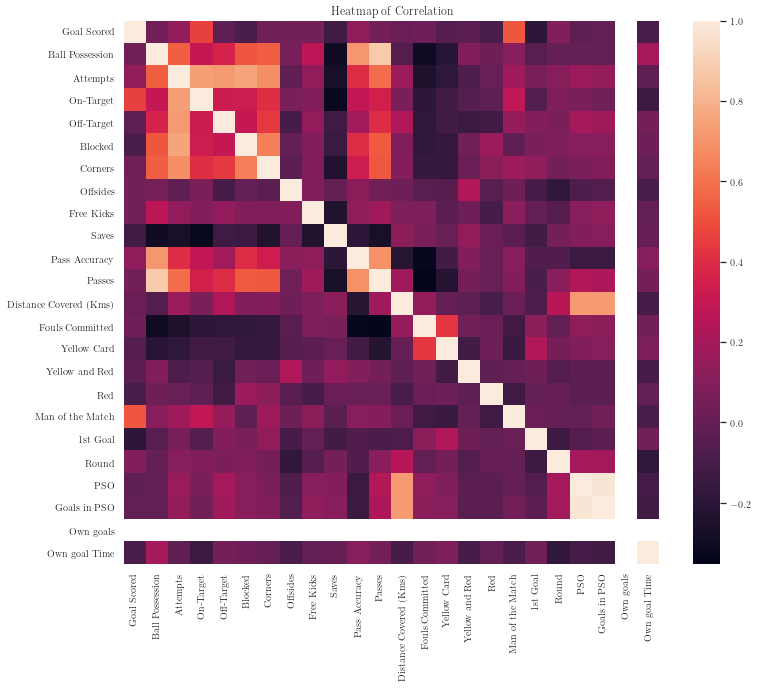

In [15]:
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

In [16]:
corr = corr[['Man of the Match']]
corr

,Man of the Match
Goal Scored,0.522193
Ball Possession %,0.110393
Attempts,0.176425
On-Target,0.291346
Off-Target,0.152979
Blocked,-0.019582
Corners,0.173148
Offsides,0.026288
Free Kicks,0.119534
Saves,-0.034443


In [17]:
corr[corr['Man of the Match'] < -0.11]

,Man of the Match
Fouls Committed,-0.129047
Yellow Card,-0.147934
Red,-0.125988


In [18]:
corr[corr['Man of the Match'] > 0.11]

,Man of the Match
Goal Scored,0.522193
Ball Possession %,0.110393
Attempts,0.176425
On-Target,0.291346
Off-Target,0.152979
Corners,0.173148
Free Kicks,0.119534
Man of the Match,1.000000


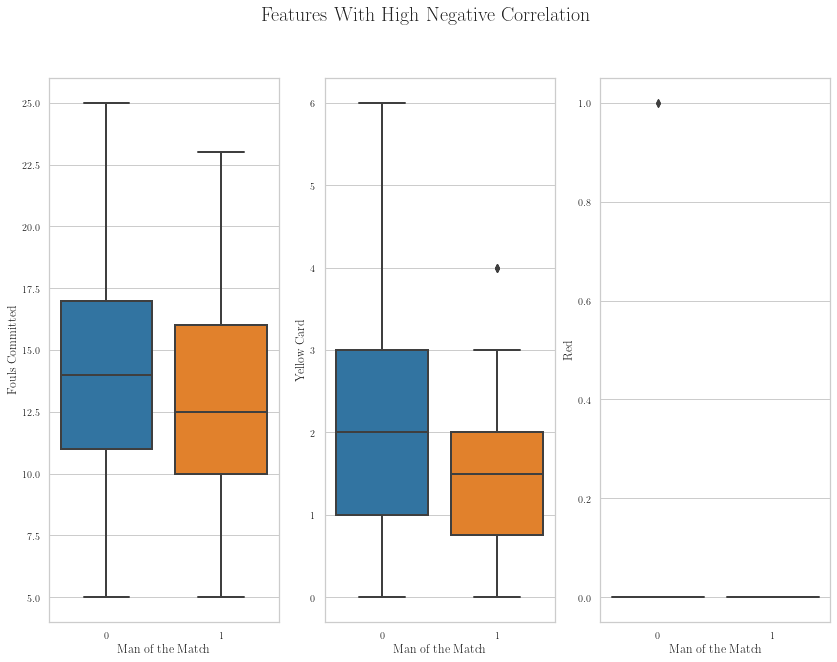

In [19]:

f, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 10))
f.suptitle('Features With High Negative Correlation', size = 20)

sns.boxplot(x = "Man of the Match", y = "Fouls Committed", data = stats_clean,ax= axes[0])
sns.boxplot(x = "Man of the Match", y = "Yellow Card", data = stats_clean,ax = axes[1])
sns.boxplot(x = "Man of the Match", y = "Red", data = stats_clean,ax = axes[2])

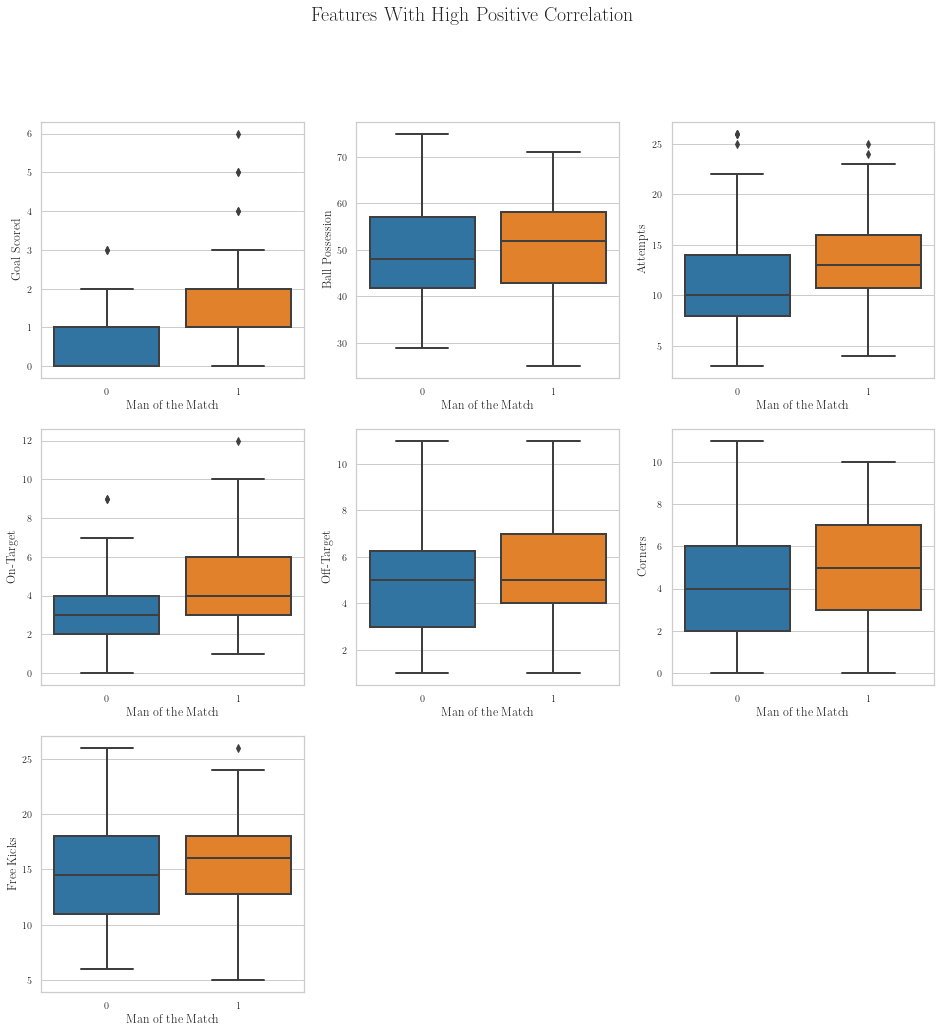

In [20]:
f, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 16))
f.suptitle('Features With High Positive Correlation', size = 20)

sns.boxplot(x = "Man of the Match", y = "Goal Scored", data = stats,ax= axes[0,0])
sns.boxplot(x = "Man of the Match", y = "Ball Possession %", data = stats,ax = axes[0,1])
sns.boxplot(x = "Man of the Match", y = "Attempts", data = stats,ax = axes[0,2])
sns.boxplot(x = "Man of the Match", y = "On-Target", data = stats,ax = axes[1,0])
sns.boxplot(x = "Man of the Match", y = "Off-Target", data = stats,ax = axes[1,1])
sns.boxplot(x = "Man of the Match", y = "Corners", data = stats,ax = axes[1,2])
sns.boxplot(x = "Man of the Match", y = "Free Kicks", data = stats,ax = axes[2,0])
f.delaxes(axes[2,1])
f.delaxes(axes[2,2])

In [21]:
#remove outliers
Q1 = stats.quantile(0.25)
Q3 = stats.quantile(0.75)
IQR = stats.var()

stats = stats[~((stats < (Q1 - 2.5 * IQR)) |(stats > (Q3 + 2.5 * IQR))).any(axis=1)]
stats


,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Yellow and Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,5,40,13,7,3,3,6,3,11,0,...,0,0,0,1,12.0,0,0,0,1.0,35.0
1,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,39.0,0,0,0,1.0,35.0
2,0,43,8,3,3,2,0,1,7,3,...,2,0,0,0,39.0,0,0,0,1.0,35.0
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,1,89.0,0,0,0,1.0,35.0
4,0,64,13,3,6,4,5,0,14,2,...,1,0,0,0,39.0,0,0,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2,58,11,2,7,2,3,0,17,4,...,2,0,0,1,40.0,2,0,0,1.0,35.0
114,1,57,26,9,7,10,8,1,16,2,...,2,0,0,0,39.0,2,0,0,1.0,13.0
115,2,43,8,3,3,2,4,0,15,9,...,2,0,0,1,13.0,2,0,0,1.0,35.0
116,0,43,7,3,3,1,1,2,8,0,...,2,0,0,0,39.0,2,0,0,1.0,35.0


In [22]:
X = stats.drop('Man of the Match', axis=1)
y = stats['Man of the Match']

In [23]:
print('Dimensions for X: ', X.shape)
print('Dimensions for Y: ', y.shape)

Dimensions for X:  (107, 23)
Dimensions for Y:  (107,)


In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '\n%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR(acc): 0.650000 (0.228583)
LR(f1): 0.611786 (0.234462)

KNN(acc): 0.497500 (0.214170)
KNN(f1): 0.344643 (0.325063)

CART(acc): 0.552500 (0.258106)
CART(f1): 0.580516 (0.320352)

SVM(acc): 0.365000 (0.109659)
SVM(f1): 0.172381 (0.246166)


<ipython-input-25-3e9c1ae8ef36>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


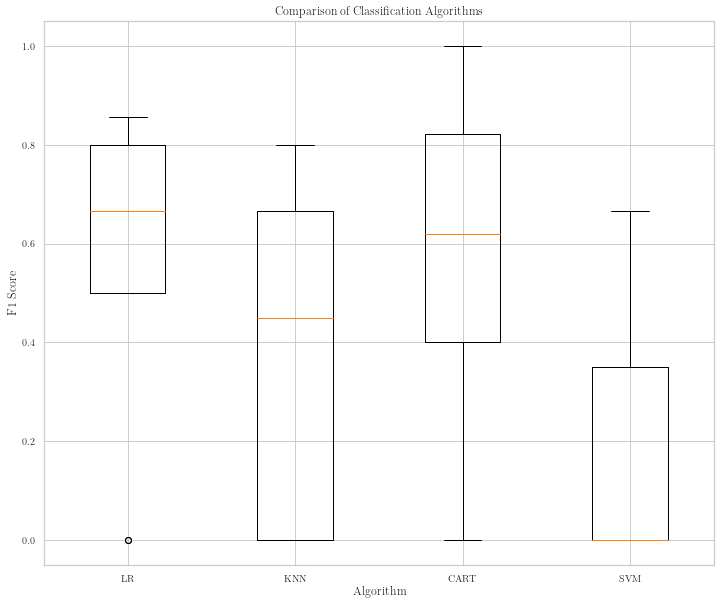

In [25]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')

plt.boxplot(results[1::2])
ax = fig.add_subplot(111)
ax.set_xticklabels(names[1::2])
plt.show()

In [26]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
# Evaluate predictions
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6363636363636364
[[4 1]
 [3 3]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



Precision score: 57% of the 'Man of the match' were predicted as 'Not' Man of the match, while 75% was predicted as being Man of the match.

The recall score: The ability of the classifier to find all 'Not' Man of the match is 80%, while the ability of the classifier to find all Man of the match is 50%.

F1 score: the weighted average of the precision and recall scores of 'Not' Man of the match is 67%, and of Man of the match is 60%.

The FN and FP values are exceptable, because they are small.

In [28]:
# Make predictions with Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
predictions = dummy.predict(X_test)

C:\myprograms\Anaconda\Anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [29]:
# Evaluate Dummy Classifier predictions
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

0.6363636363636364
[[5 0]
 [4 2]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.33      0.50         6

    accuracy                           0.64        11
   macro avg       0.78      0.67      0.61        11
weighted avg       0.80      0.64      0.60        11

